In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
!gdown "https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS"

Downloading...
From: https://drive.google.com/uc?id=1NBk1TFkK4NeKdodR2DxIdBp2Mk1mh4AS
To: /content/insurance.csv
100% 30.8k/30.8k [00:00<00:00, 30.7MB/s]


In [33]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [34]:
df.shape

(986, 11)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [36]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [37]:
# Compute the correlation matrix

correlation_matrix = df.corr()

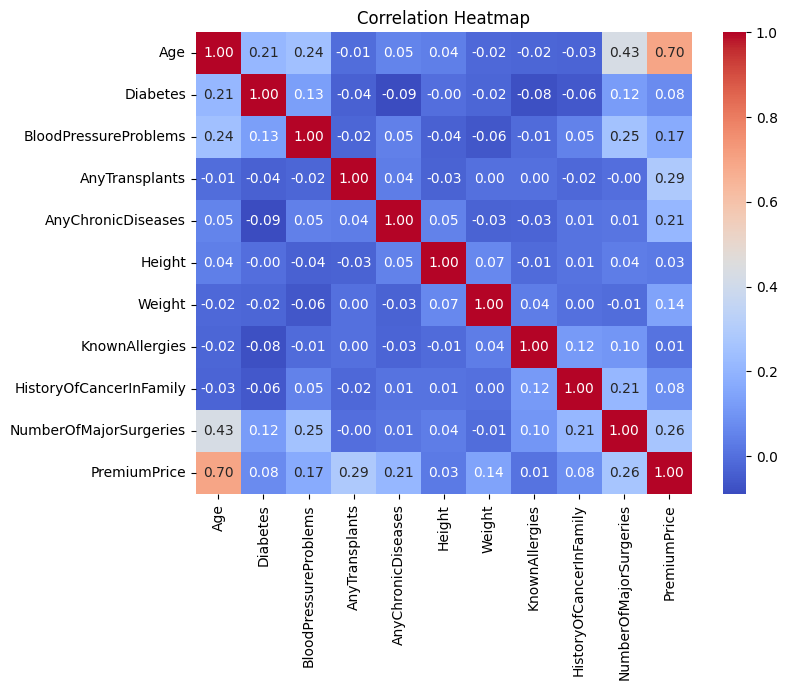

In [38]:
# Plot the heatmap

plt.figure(figsize=(8,6))

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()

It is clear that ***Age*** and ***Premium price*** is highly correlated.

## OutLier Detection

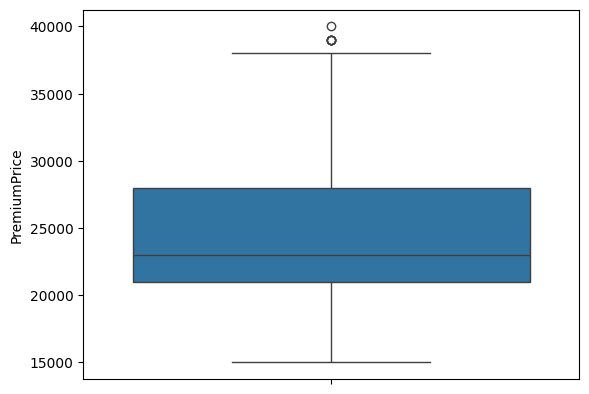

In [39]:
sns.boxplot(data=df['PremiumPrice'])
plt.show()

<Axes: >

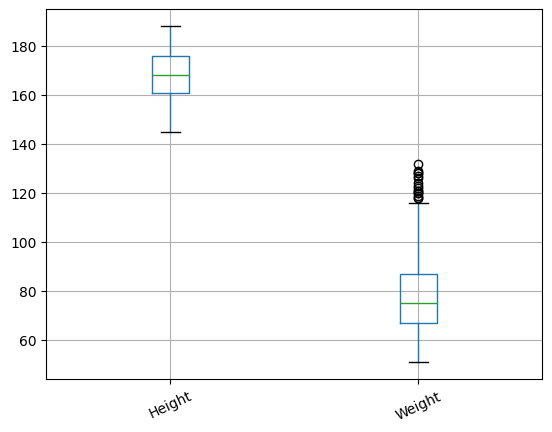

In [40]:
df[['Height','Weight']].boxplot(rot=25)

In [41]:
Q1 = df.PremiumPrice.quantile(0.05)
Q3 = df.PremiumPrice.quantile(0.95)

IQR = Q3-Q1

In [42]:
df = df[~((df['PremiumPrice'] < (Q1 - IQR*1.5)) | (df['PremiumPrice'] > (Q1 + IQR*1.5)))]
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [43]:
def categorize_age(age):
    if age > 18 and age <= 21:
        return "YoungAdult"
    elif age > 21 and age <= 39:
        return "Adult"
    elif age > 39 and age <= 55:
        return "MiddleAged"
    else:
        return "Retiree"


df['AgeCat'] = df['Age'].apply(categorize_age)

In [44]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeCat
0,45,0,0,0,0,155,57,0,0,0,25000,MiddleAged
1,60,1,0,0,0,180,73,0,0,0,29000,Retiree
2,36,1,1,0,0,158,59,0,0,1,23000,Adult
3,52,1,1,0,1,183,93,0,0,2,28000,MiddleAged
4,38,0,0,0,1,166,88,0,0,1,23000,Adult


In [45]:
df.groupby('AgeCat')['PremiumPrice'].mean().sort_values()

,PremiumPrice
AgeCat,
YoungAdult,15881.355932
Adult,20844.192635
MiddleAged,27270.114943
Retiree,27482.300885


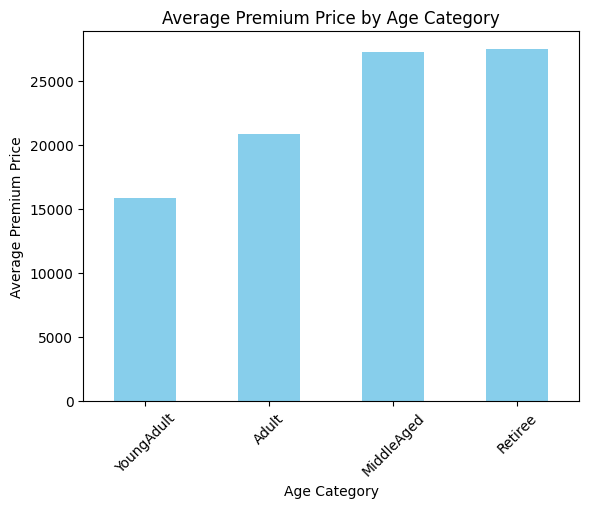

In [46]:
# Assuming df is your pandas DataFrame containing AgeCat and PremiumPrice columns
df.groupby('AgeCat')['PremiumPrice'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Premium Price by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Average Premium Price')
plt.xticks(rotation=45)
plt.show()

In [47]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'AgeCat'],
      dtype='object')

In [48]:
diabetes_premium = df.groupby('Diabetes')['PremiumPrice'].mean()
diabetes_premium

,PremiumPrice
Diabetes,
0,23931.818182
1,24896.135266


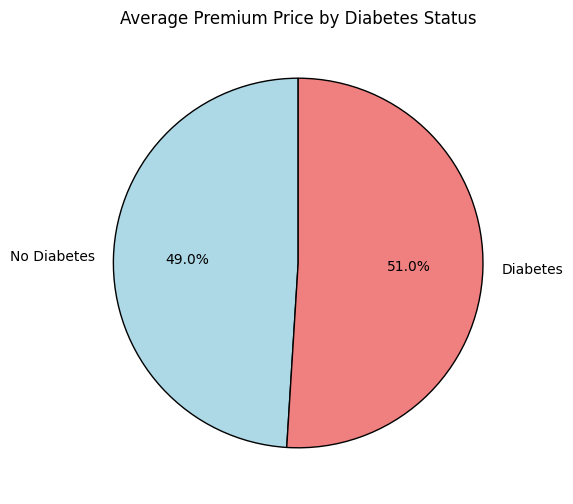

In [49]:
labels = ['No Diabetes', 'Diabetes']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(diabetes_premium, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'],
        startangle=90, wedgeprops={'edgecolor': 'black'})

# Title
plt.title('Average Premium Price by Diabetes Status')
plt.show()

In [50]:
df.groupby('NumberOfMajorSurgeries')['PremiumPrice'].mean()

,PremiumPrice
NumberOfMajorSurgeries,
0,22968.684760
1,24741.935484
2,28084.033613
3,28000.000000


In [51]:
df.groupby(['Diabetes', 'BloodPressureProblems', 'AnyTransplants','KnownAllergies','HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'])['PremiumPrice'].mean()

Diabetes  BloodPressureProblems  AnyTransplants  KnownAllergies  HistoryOfCancerInFamily  NumberOfMajorSurgeries
0         0                      0               0               0                        0                         21505.952381
                                                                                          1                         22976.190476
                                                                                          2                         28000.000000
                                                                                          3                         28000.000000
                                                                 1                        1                         23000.000000
                                                                                          2                         28000.000000
                                                 1               0                        0                         21238.095238
                                                                                          1                         22136.363636
                                                                 1                        1                         24666.666667
                                 1               0               0                        0                         31100.000000
                                                                                          1                         26500.000000
                                                                 1                        1                         34333.333333
                                                 1               0                        1                         32250.000000
          1                      0               0               0                        0                         22920.634921
                                                                                          1                         25254.901961
                                                                                          2                         27851.851852
                                                                 1                        1                         24500.000000
                                                                                          2                         28000.000000
                                                 1               0                        0                         20071.428571
                                                                                          1                         27000.000000
                                                                                          2                         28000.000000
                                                                 1                        1                         29090.909091
                                 1               0               0                        0                         34500.000000
                                                                                          1                         37000.000000
                                                                                          2                         28000.000000
                                                                 1                        1                         38000.000000
                                                 1               0                        1                         37000.000000
                                                                                          2                         29000.000000
1         0                      0               0               0                        0                         23722.772277
                                                                                          1                         21666.666667
                 

## Hypothesis Testing

In [52]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeCat
0,45,0,0,0,0,155,57,0,0,0,25000,MiddleAged
1,60,1,0,0,0,180,73,0,0,0,29000,Retiree
2,36,1,1,0,0,158,59,0,0,1,23000,Adult
3,52,1,1,0,1,183,93,0,0,2,28000,MiddleAged
4,38,0,0,0,1,166,88,0,0,1,23000,Adult


In [53]:
df.groupby('Diabetes')['PremiumPrice'].mean()

,PremiumPrice
Diabetes,
0,23931.818182
1,24896.135266




*   $H_0$ : No significant difference in Premium Price between the groups. $\mu_1 = \mu_2$
*   $H_a$ : There is a significant difference in Premium Price between Diabetic and Non-Diabetic individuals. $\mu_1 \neq \mu_2$



- $μ_1 = 23932$
- $μ_2 = 24896$




1.   $H_a: \mu_1 \neq \mu_2$



### Normality Check (Shapiro-Wilk Test & Q-Q Plot)

In [54]:
from scipy.stats import ttest_ind,shapiro


Non_Diabetic = df[df['Diabetes'] == 0]['PremiumPrice']
Diabetic = df[df['Diabetes'] == 1]['PremiumPrice']

# Shapiro-Wilk Test
print('Shepiro-walk test for Normality')
print('Non_Diabetic:',shapiro(Non_Diabetic))
print('Non_Diabetic:',shapiro(Diabetic))

Shepiro-walk test for Normality
Non_Diabetic: ShapiroResult(statistic=0.9206751363074221, pvalue=8.942543496095571e-17)
Non_Diabetic: ShapiroResult(statistic=0.9228845147661311, pvalue=9.530847250043672e-14)


The Shapiro-Wilk test results show p-values < 0.05 for both Non-Diabetic and Diabetic groups, indicating that their Premium Price distributions are not normally distributed. Since normality is violated, a non-parametric test (Mann-Whitney U Test) is recommended instead of a T-test.



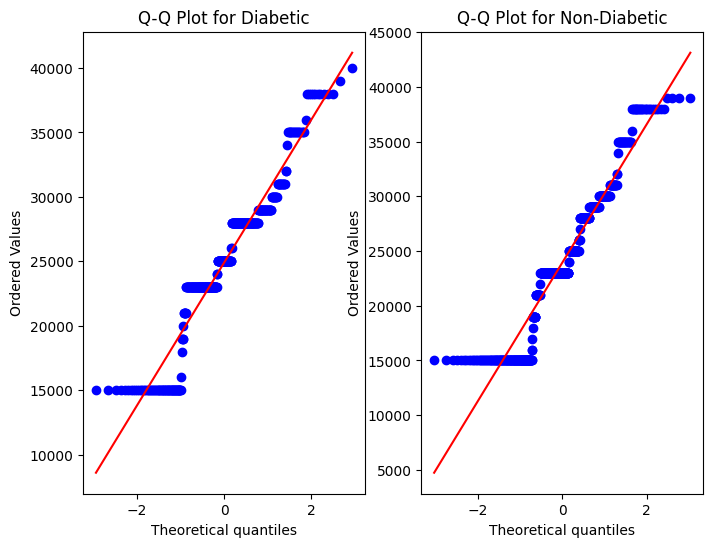

In [55]:
# Q-Q Plot
import scipy.stats as stats
fig, axes = plt.subplots(1,2,figsize=(8,6))
stats.probplot(Diabetic, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot for Diabetic")
stats.probplot(Non_Diabetic, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot for Non-Diabetic")
plt.show()

Clear from the visualisation that data is not normally distributed.

## **Mann-Whitney U Test**

In [56]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U Test
stat, p_value  = mannwhitneyu(Non_Diabetic,Diabetic,alternative='two-sided')

# Display results
print(f"Mann-Whitney U Test Statistic: {stat:.4f}, P-value: {p_value :.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is a significant difference in Premium Price between Diabetic and Non-Diabetic individuals.")
else:
    print("Fail to Reject H0: No significant difference in Premium Price between the groups.")

Mann-Whitney U Test Statistic: 106563.5000, P-value: 0.0065
Reject H0: There is a significant difference in Premium Price between Diabetic and Non-Diabetic individuals.





Our analysis examines whether there is a **significant difference** in insurance premium prices between diabetic and non-diabetic individuals. The **Shapiro-Wilk test** showed that the data is **not normally distributed**, so we used the Mann-Whitney U Test instead of a t-test. The results (p-value = **0.0065**) indicate a **statistically significant difference** in premium prices between the two groups. Diabetic individuals tend to pay **higher premium**s, likely due to increased health risks. This insight highlights the impact of health conditions on insurance pricing and the importance of data-driven decision-making.



*   $H_0$ : No significant evidence that Non-Diabetics have higher Premium Prices than Diabetics. $\mu_1 = \mu_2$
*   $H_a$ : Non-Diabetics have significantly higher Premium Prices than Diabetics $\mu_1 < \ \mu_2$



2.   $H_a: \mu_1 < \mu_2$



In [59]:
t_stat,pvalue = mannwhitneyu(Non_Diabetic,Diabetic,alternative='less')
print(f"Mann-Whitney U Test Statistic: {t_stat:.4f}, P-value: {pvalue :.4f}")

alpha = 0.05 #Significance level


if pvalue<alpha:
  print('Reject H0 : Non-Diabetics have significantly higher Premium Prices than Diabetics ')
else:
  print('Fail to Reject H0: No significant evidence that Non-Diabetics have higher Premium Prices than Diabetics.')

Mann-Whitney U Test Statistic: 106563.5000, P-value: 0.0032
Reject H0 : Non-Diabetics have significantly higher Premium Prices than Diabetics 


*  The **Mann-Whitney U Test** results show a **U statistic of 106,563.5** and a **p-value of 0.0032**, which is less than the **significance level (α = 0.05)**. This means we **reject the null hypothesis (H₀)** and conclude that Non-Diabetics have s**ignificantly higher Premium Prices than Diabetics**. Since this is a one-tailed test (μ₁ < μ₂), the result supports the claim that **Non-Diabetics pay higher premiums compared to Diabetics**.


In [60]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeCat
0,45,0,0,0,0,155,57,0,0,0,25000,MiddleAged
1,60,1,0,0,0,180,73,0,0,0,29000,Retiree
2,36,1,1,0,0,158,59,0,0,1,23000,Adult
3,52,1,1,0,1,183,93,0,0,2,28000,MiddleAged
4,38,0,0,0,1,166,88,0,0,1,23000,Adult


In [61]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'AgeCat'],
      dtype='object')

In [62]:
df['HealthCondition'] = df[['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases', 'KnownAllergies',
    'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']].apply(lambda x: 1 if x.sum()>0 else 0,axis=1)

In [63]:
# def health_con(row):


#     columns_to_check = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants','AnyChronicDiseases', 'KnownAllergies',
#                       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']


#     if row[columns_to_check].sum() > 0:
#       return 1
#     else:
#       return 0


# df.apply(health_con,axis=1)


df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeCat,HealthCondition
0,45,0,0,0,0,155,57,0,0,0,25000,MiddleAged,0
1,60,1,0,0,0,180,73,0,0,0,29000,Retiree,1
2,36,1,1,0,0,158,59,0,0,1,23000,Adult,1
3,52,1,1,0,1,183,93,0,0,2,28000,MiddleAged,1
4,38,0,0,0,1,166,88,0,0,1,23000,Adult,1


In [64]:
df.groupby('HealthCondition')['PremiumPrice'].mean()

,PremiumPrice
HealthCondition,
0,20436.090226
1,24944.900352


In [65]:
Healthy = df[df['HealthCondition'] == 0]['PremiumPrice']
unHealthy = df[df['HealthCondition'] == 1]['PremiumPrice']

*   $H_0$ : Both Non-Healthy and Healthy have same PremiumPrice $\mu_1 = \mu_2$
*   $H_a$ : Both Non-Healthy and Healthy have the different PremiumPrice $\mu_1 \neq \mu_2$

In [67]:
t_stat,pvalue = mannwhitneyu(Healthy,unHealthy)
print(f'Mann-Whitney U Test Statistic:{t_stat},p_value : {pvalue}')

alpha = 0.05 #Significance level


if pvalue<alpha:
  print('Reject H0 : Both Non-Healthy and Healthy have the different PremiumPrice')
else:
  print('Fail to Reject H0 : Both Non-Healthy and Healthy have same PremiumPrice')

Mann-Whitney U Test Statistic:32476.0,p_value : 7.934027110756244e-16
Reject H0 : Both Non-Healthy and Healthy have the different PremiumPrice


The **Mann-Whitney U Test results** show a **U statistic of 32,476.0** and a **p-value of 7.93e-16**, which is extremely small and much lower than the significance level **(α = 0.05)**. This means we reject the **null hypothesis (H₀) **and conclude that Healthy and Non-Healthy individuals have **significantly different Premium Prices**. The result strongly supports the claim that health status plays a crucial role in determining Premium Prices.

---

## <font color='blue'> One Way - ANOVA </font>

In [68]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeCat,HealthCondition
0,45,0,0,0,0,155,57,0,0,0,25000,MiddleAged,0
1,60,1,0,0,0,180,73,0,0,0,29000,Retiree,1
2,36,1,1,0,0,158,59,0,0,1,23000,Adult,1
3,52,1,1,0,1,183,93,0,0,2,28000,MiddleAged,1
4,38,0,0,0,1,166,88,0,0,1,23000,Adult,1


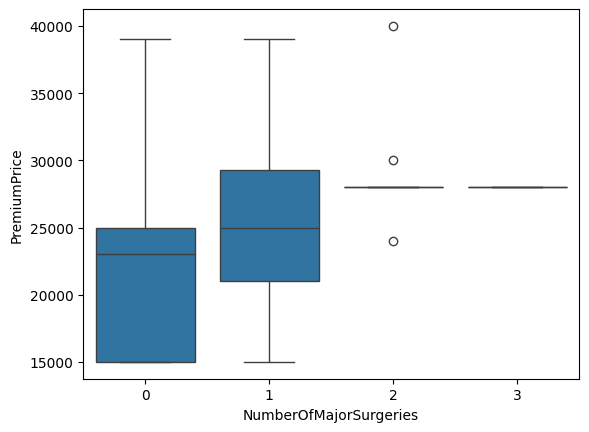

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.boxplot(x='NumberOfMajorSurgeries',y='PremiumPrice',data=df)
plt.show()

It is clear that the way different cats behave varies greatly.

We can see that Person with **0 Surgeries** Average **PremiumPrice** is around **23k** and person with **1 surgeries** average PremiumPrice around **25k**

- **Null hypothesis ($H_0$):** States that the means of all groups are equal.
- **Alternate hypothesis ($H_1$):**  States that at least one of the means is different.

In [70]:
from scipy.stats import f_oneway # Numeric Vs categorical for many categories
from scipy.stats import ttest_ind # Numeric Vs categorical
from statsmodels.graphics.gofplots import qqplot

In [71]:
price1 = df[df['NumberOfMajorSurgeries']==0]['PremiumPrice']
price2 = df[df['NumberOfMajorSurgeries']==1]['PremiumPrice']
price3 = df[df['NumberOfMajorSurgeries']==2]['PremiumPrice']
price4 = df[df['NumberOfMajorSurgeries']==3]['PremiumPrice']

In [73]:
from scipy import stats

# Perform Shapiro-Wilk test for normality
shapiro_test1 = stats.shapiro(price1)
shapiro_test2 = stats.shapiro(price2)
shapiro_test3 = stats.shapiro(price3)
# shapiro_test4 = stats.shapiro(price4)

# Print the results
print(f"Shapiro-Wilk test for price1: {shapiro_test1}")
print(f"Shapiro-Wilk test for price2: {shapiro_test2}")
print(f"Shapiro-Wilk test for price3: {shapiro_test3}")
# print(f"Shapiro-Wilk test for price4: {shapiro_test4}")

Shapiro-Wilk test for price1: ShapiroResult(statistic=0.8885394048976657, pvalue=3.901965395277343e-18)
Shapiro-Wilk test for price2: ShapiroResult(statistic=0.930892659508563, pvalue=4.194464670933881e-12)
Shapiro-Wilk test for price3: ShapiroResult(statistic=0.12415256176626321, pvalue=1.8090482740166476e-23)


Since all three groups have **p-values** much l**ower than 0.05**, we **reject the assumption of normality** required for **ANOVA**. This suggests that a **non-parametric alternative** such as the **Kruskal-Wallis test** may be more appropriate for comparing the distributions instead of a traditional **ANOVA**.

In [75]:
from scipy.stats import kruskal

print(price1.mean(), price2.mean(), price3.mean())

# H0: All groups have the same median
# Ha: One or more groups have different median
f_stats, p_value = kruskal(price1, price2, price3)


print("test statistic:",f_stats)
print("p_value:",p_value)


if p_value<0.5:
  print('Reject H0')
  print('One or more groups have different median')
else:
  print('Failed to reject H0')
  print('All groups have the same median')

22968.684759916494 24741.935483870966 28084.03361344538
test statistic: 86.36021998963201
p_value: 1.7665116311226214e-19
Reject H0
One or more groups have different median


In [ ]:
df['AgeCat'].value_counts()

,count
AgeCat,
Adult,353
MiddleAged,348
Retiree,226
YoungAdult,59


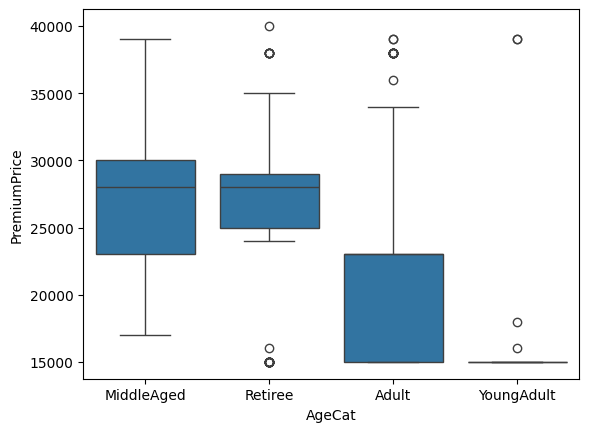

In [ ]:
sns.boxplot(x='AgeCat',y='PremiumPrice',data=df)
plt.show()

In [76]:
agecat1 = df[df['AgeCat']=='Adult']['PremiumPrice']
agecat2 = df[df['AgeCat']=='MiddleAged']['PremiumPrice']
agecat3 = df[df['AgeCat']=='Retiree']['PremiumPrice']
agecat4 = df[df['AgeCat']=='YoungAdult']['PremiumPrice']


from scipy import stats

# Perform Shapiro-Wilk test for normality
shapiro_test1 = stats.shapiro(agecat1)
shapiro_test2 = stats.shapiro(agecat2)
shapiro_test3 = stats.shapiro(agecat3)
shapiro_test4 = stats.shapiro(agecat4)

# Print the results
print(f"Shapiro-Wilk test for price1: {shapiro_test1}")
print(f"Shapiro-Wilk test for price2: {shapiro_test2}")
print(f"Shapiro-Wilk test for price3: {shapiro_test3}")
print(f"Shapiro-Wilk test for price4: {shapiro_test4}")

Shapiro-Wilk test for price1: ShapiroResult(statistic=0.7927094795734434, pvalue=6.841395216198284e-21)
Shapiro-Wilk test for price2: ShapiroResult(statistic=0.8931904859382942, pvalue=6.859874585853294e-15)
Shapiro-Wilk test for price3: ShapiroResult(statistic=0.8386762975425954, pvalue=1.3624923983054719e-14)
Shapiro-Wilk test for price4: ShapiroResult(statistic=0.19934239989554203, pvalue=2.833971611426886e-16)


Since all four groups have p-values far below 0.05, we reject the normality assumption required for ANOVA. Given that the data is not normally distributed, it would be more appropriate to use a non-parametric alternative, such as the Kruskal-Wallis test, instead of the traditional one-way ANOVA for comparing these distributions.

In [79]:
from scipy.stats import kruskal

print(agecat1.mean(), agecat2.mean(), agecat3.mean(),agecat4.mean())

# H0: All groups have the same median
# Ha: One or more groups have different median
f_stats, p_value = kruskal(agecat1, agecat2, agecat3,agecat4)


print("test statistic:",f_stats)
print("p_value:",p_value)


if p_value<0.5:
  print('Reject H0')
  print('Atleast groups have different median')
else:
  print('Failed to reject H0')
  print('All groups have the same median')

20844.192634560906 27270.114942528737 27482.300884955752 15881.35593220339
test statistic: 408.4522208611003
p_value: 3.268114494633374e-88
Reject H0
Atleast groups have different median


In [78]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeCat,HealthCondition
0,45,0,0,0,0,155,57,0,0,0,25000,MiddleAged,0
1,60,1,0,0,0,180,73,0,0,0,29000,Retiree,1
2,36,1,1,0,0,158,59,0,0,1,23000,Adult,1
3,52,1,1,0,1,183,93,0,0,2,28000,MiddleAged,1
4,38,0,0,0,1,166,88,0,0,1,23000,Adult,1


---

## <font color='blue'>Chi-square Test

In [ ]:
# Handle duplicates by grouping and summing the counts

df_grouped = df.groupby(["AnyChronicDiseases", "HistoryOfCancerInFamily"], as_index=False).sum()
df_grouped

,AnyChronicDiseases,HistoryOfCancerInFamily,Age,Diabetes,BloodPressureProblems,AnyTransplants,Height,Weight,KnownAllergies,NumberOfMajorSurgeries,PremiumPrice,AgeCat,HealthCondition
0,0,0,29706,320,320,38,119926,55085,143,433,16811000,MiddleAgedRetireeAdultAdultAdultAdultMiddleAge...,581
1,0,1,3754,36,50,4,15784,7271,35,102,2359000,MiddleAgedAdultYoungAdultMiddleAgedYoungAdultA...,94
2,1,0,6735,54,80,12,26359,11846,29,97,4197000,MiddleAgedAdultMiddleAgedAdultAdultAdultRetire...,156
3,1,1,966,4,12,1,3759,1671,5,26,629000,MiddleAgedAdultAdultMiddleAgedMiddleAgedAdultM...,22


In [ ]:
# Create a contingency table

contingency_table = df_grouped.pivot(index="AnyChronicDiseases", columns="HistoryOfCancerInFamily", values="PremiumPrice")
contingency_table

HistoryOfCancerInFamily,0,1
AnyChronicDiseases,,
0,16811000,2359000
1,4197000,629000


- $H_0$: HistoryOfCancerInFamily and AnyChronicDiseases are independent
- $H_1$: HistoryOfCancerInFamily and AnyChronicDiseases are not independent

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("HistoryOfCancerInFamily and AnyChronicDiseases are independent")
else:
    print("HistoryOfCancerInFamily and AnyChronicDiseases are not independent")

Chi-square statistic: 1873.6553593988328
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[16782937.1561927  2387062.8438073]
 [ 4225062.8438073   600937.1561927]]
HistoryOfCancerInFamily and AnyChronicDiseases are independent


- $H_0$: Diabetes and BloodPressureProblems are independent
- $H_1$: Diabetes and BloodPressureProblems are not independent

In [ ]:
# Handle duplicates by grouping and summing the counts

df_grouped1 = df.groupby(["Diabetes", "BloodPressureProblems"], as_index=False).sum()
df_grouped1

,Diabetes,BloodPressureProblems,Age,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeCat,HealthCondition
0,0,0,11865,19,74,56407,26090,81,37,145,7597000,MiddleAgedAdultAdultAdultAdultAdultAdultRetire...,202
1,0,1,10581,17,46,39812,18096,58,39,192,6092000,RetireeMiddleAgedYoungAdultAdultMiddleAgedReti...,237
2,1,0,8328,13,12,31909,14660,34,17,112,4642000,RetireeMiddleAgedRetireeAdultRetireeMiddleAged...,189
3,1,1,10387,6,46,37700,17027,39,23,209,5665000,AdultMiddleAgedAdultAdultRetireeAdultRetireeMi...,225


In [ ]:
contingency_table1 = df_grouped1.pivot(index='Diabetes',columns='BloodPressureProblems',values="PremiumPrice")
contingency_table1

BloodPressureProblems,0,1
Diabetes,,
0,7597000,6092000
1,4642000,5665000


In [ ]:
# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table1)

# Output results
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpretation
if p < 0.05:
    print("Diabetes and BloodPressureProblems are independent")
else:
    print("Diabetes and BloodPressureProblems are not independent")

Chi-square statistic: 257420.56200463558
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[6981983.28888148 6707016.71111852]
 [5257016.71111852 5049983.28888148]]
Diabetes and BloodPressureProblems are independent


## Regression Analysis

-Null Hypothesis ($H_0$): The predictor has no significant effect on the premium price.

-Alternative Hypothesis ($H_1$): The predictor has a significant effect on the premium price.

In [ ]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,AgeCat,HealthCondition
0,45,0,0,0,0,155,57,0,0,0,25000,MiddleAged,0
1,60,1,0,0,0,180,73,0,0,0,29000,Retiree,1
2,36,1,1,0,0,158,59,0,0,1,23000,Adult,1
3,52,1,1,0,1,183,93,0,0,2,28000,MiddleAged,1
4,38,0,0,0,1,166,88,0,0,1,23000,Adult,1


In [ ]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice',
       'AgeCat', 'HealthCondition'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Independent variables (predictors)
X = df[['Age','Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']]

# Dependent variable (target)
y = df['PremiumPrice']

print(X.shape,y.shape)

(986, 10) (986,)


In [ ]:
# Add a constant for the intercept
X_sm = sm.add_constant(X)

# Fit the model
model = sm.OLS(y,X_sm).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     175.5
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          3.92e-210
Time:                        15:23:52   Log-Likelihood:                -9508.6
No. Observations:                 986   AIC:                         1.904e+04
Df Residuals:                     975   BIC:                         1.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

In [ ]:
# Split the data into training and testing sets

Xtrain, Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.2,random_state=42)

# Fit the model
reg = LinearRegression()
reg.fit(Xtrain,ytrain)


# Predictions
ypred = reg.predict(Xtest)


# Evaluation
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("Mean Squared Error:", mean_squared_error(ytest, ypred))
print("R-squared:", r2_score(ytest, ypred))

Coefficients: [ 3.25506423e+02 -3.96349602e+02  1.58110629e+02  7.48956767e+03
  2.54753510e+03 -3.89192769e+00  6.95446175e+01  1.95117272e+02
  2.11982109e+03 -7.00874830e+02]
Intercept: 5381.50505918383
Mean Squared Error: 12221661.705858212
R-squared: 0.7133944270278739
